In [1]:
import sklearn.datasets as ds
import pandas as pd
import numpy as np

iris_X, iris_y = ds.load_iris(return_X_y=True)
labels = ("Setosa", "Versicolor", "Virginica")

df = pd.DataFrame(iris_X, columns=["Sepal length", "Sepal width",
                                   "Petal length", "Petal width"])
df['Class'] = iris_y
df['Class'] = df['Class'].map(lambda c: labels[c])
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


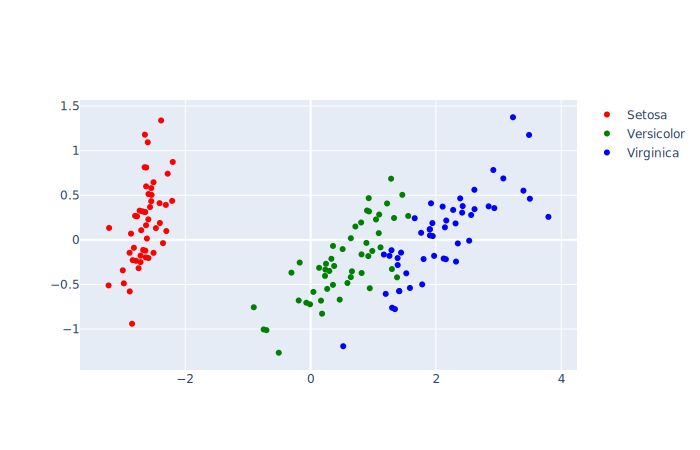

In [2]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
iris_X_2d = pca_2d.fit_transform(iris_X)

import plotly.graph_objects as go

def gr_dataset(fig): 
    for lab, col in enumerate(("red", "green", "blue")):
        fig.add_trace(go.Scatter(x=iris_X_2d[iris_y==lab, 0],
                                 y=iris_X_2d[iris_y==lab, 1],
                                 mode="markers",
                                 marker_color=col,
                                 name=labels[lab]))

fig = go.Figure()
gr_dataset(fig)
f = go.FigureWidget(fig)
f.show("svg")

In [34]:
setosa_X = iris_X_2d.copy()[iris_y==0]
setosa_mean = setosa_X.mean(axis=0)

versicolor_X = iris_X_2d.copy()[iris_y==1]
versicolor_mean = versicolor_X.mean(axis=0)

virginica_X = iris_X_2d.copy()[iris_y==2]
virginica_mean = virginica_X.mean(axis=0)

train_setosa_X = np.vstack([setosa_X, [virginica_mean]])
train_setosa_y = [1] * (len(train_setosa_X) - 1) + [0]

train_versicolor_X = np.vstack([versicolor_X, [virginica_mean]])
train_versicolor_y = [1] * (len(train_versicolor_X) - 1) + [0]

train_virginica_X = np.vstack([virginica_X, [versicolor_mean]])
train_virginica_y = [1] * (len(train_virginica_X) - 1) + [0]

In [75]:
def gr_membership_contour(estimated_membership, colorscale):
    fig = go.Figure()
    gr_dataset(fig)
    x = np.linspace(-4, 4, 30)
    y = np.linspace(-1.5, 1.5, 30)
    X, Y = np.meshgrid(x, y)
    zs = estimated_membership(np.array((np.ravel(X), np.ravel(Y))).T)
    Z = zs.reshape(X.shape)

    fig.add_trace(go.Contour(x=x, y=y, z=Z,
                             colorscale=colorscale,
                             line_smoothing=0.85,
                             contours={"start": 0, "end": 1, "size": .1,
                                       "showlabels": True,
                                       "labelfont": {"size": 12,
                                                     "color": "white"}
                                       },
                             showscale=False))
    go.FigureWidget(fig).show("svg")

colorscale_setosa = [[0, 'rgba(0.1, 0, 0, 0.0)'],
                     [1, 'rgba(0.9, 0, 0, 0.5)']]

colorscale_versicolor = [[0, 'rgba(0, 0.1, 0, 0.0)'],
                         [1, 'rgba(0, 0.9, 0, 0.5)']]

colorscale_virginica = [[0, 'rgba(0, 0, 0.1, 0.0)'],
                        [1, 'rgba(0, 0, 0.9, 0.5)']]

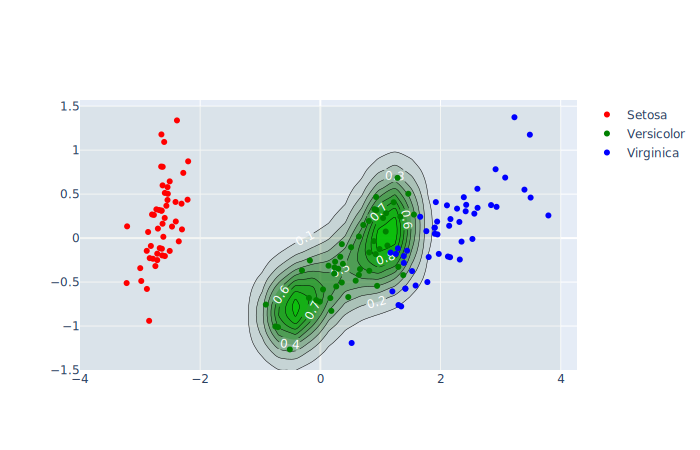

In [93]:
from mulearn import FuzzyInductor
from mulearn.kernel import GaussianKernel

fi_versicolor = FuzzyInductor(k=GaussianKernel(.7))
fi_versicolor.fit(train_versicolor_X, train_versicolor_y)
gr_membership_contour(fi_versicolor.predict, colorscale=colorscale_versicolor)

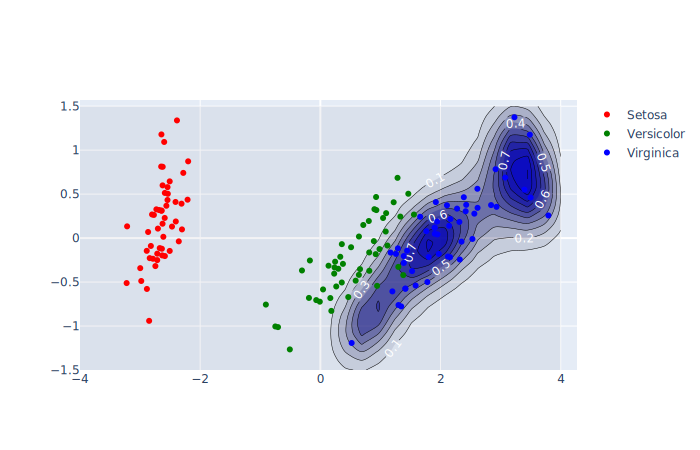

In [94]:
fi_virginica = FuzzyInductor(k=GaussianKernel(.7))
fi_virginica.fit(train_virginica_X, train_virginica_y)
gr_membership_contour(fi_virginica.predict, colorscale=colorscale_virginica)

In [95]:
versicolor_X[versicolor_X[:, 1] > 0.5 ]

array([[1.28482569, 0.68516047],
       [1.46430232, 0.50426282]])

In [96]:
fi_virginica.predict([[1.28482569, 0.68516047]])

array([0.01253545])

In [97]:
fi_versicolor.predict([[1.28482569, 0.68516047]])

array([0.1761985])

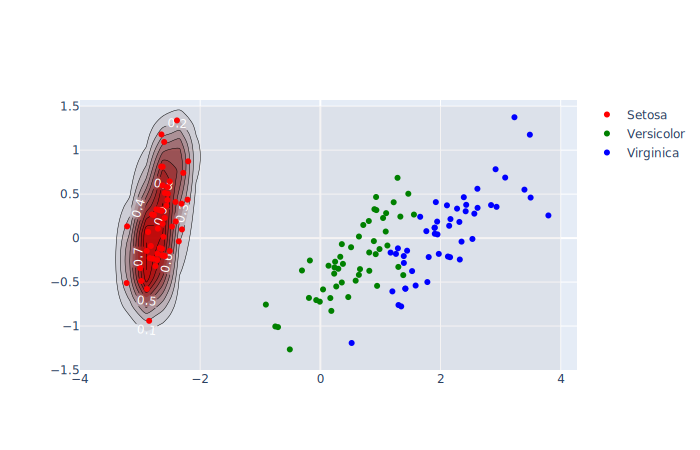

In [98]:
fi_setosa = FuzzyInductor(k=GaussianKernel(.7))
fi_setosa.fit(train_setosa_X, train_setosa_y)
gr_membership_contour(fi_setosa.predict, colorscale=colorscale_setosa)

In [99]:
inferred = {'setosa': fi_setosa.predict,
            'versicolor': fi_versicolor.predict,
            'virginica': fi_virginica.predict}

def mu(c, x):
    return inferred[c](x) / sum([inferred[k](x) for k in inferred])

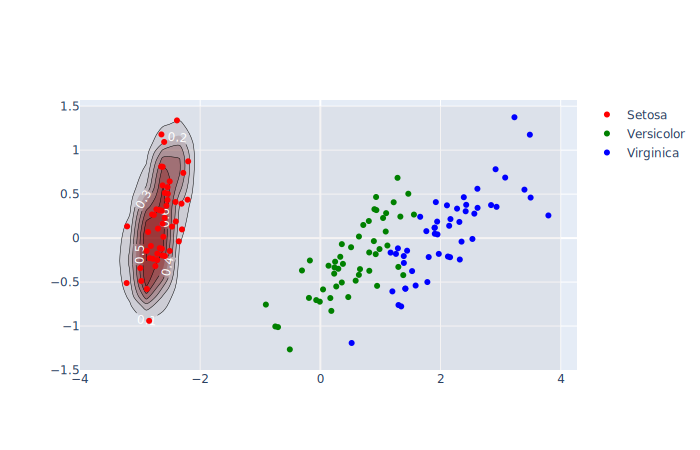

In [100]:
gr_membership_contour(lambda x: mu('setosa', x),
                      colorscale=colorscale_setosa)

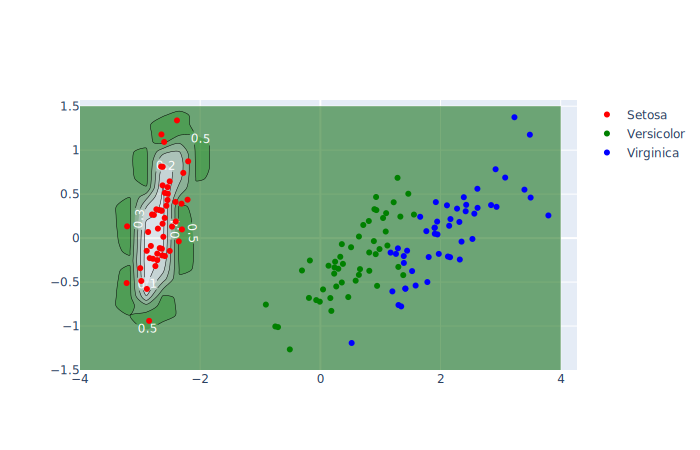

In [101]:
gr_membership_contour(lambda x: mu('versicolor', x),
                      colorscale=colorscale_versicolor)


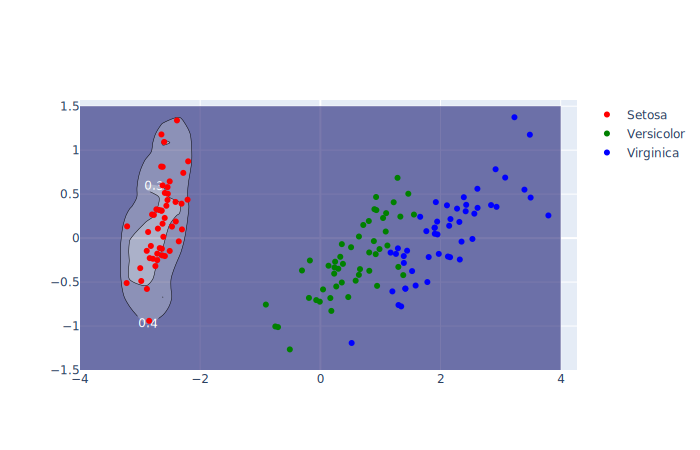

In [102]:
gr_membership_contour(lambda x: mu('virginica', x),
                      colorscale=colorscale_virginica)

In [84]:
mu('virginica', [[1, 0.75]])

array([0.49999594])

In [85]:
mu('versicolor', [[1, 0.75]])

array([0.49999594])

In [74]:
mu('setosa', [[2, 0]])

array([8.12692141e-06])

In [104]:
pca_1d = PCA(n_components=1)
iris_X_1d = pca_1d.fit_transform(iris_X)

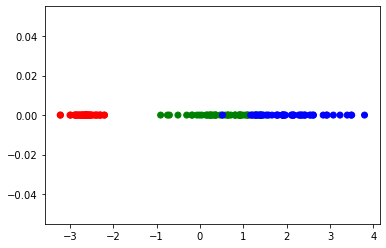

In [112]:
import matplotlib.pyplot as plt

col = {0: 'red', 1: 'green', 2: 'blue'}

plt.scatter(iris_X_1d, [0] * len(iris_X_1d), color=[col[c] for c in iris_y])
plt.show()

In [113]:
setosa_X = iris_X_1d.copy()[iris_y==0]
setosa_mean = setosa_X.mean(axis=0)

versicolor_X = iris_X_1d.copy()[iris_y==1]
versicolor_mean = versicolor_X.mean(axis=0)

virginica_X = iris_X_1d.copy()[iris_y==2]
virginica_mean = virginica_X.mean(axis=0)

train_setosa_X = np.vstack([setosa_X, [virginica_mean]])
train_setosa_y = [1] * (len(train_setosa_X) - 1) + [0]

train_versicolor_X = np.vstack([versicolor_X, [virginica_mean]])
train_versicolor_y = [1] * (len(train_versicolor_X) - 1) + [0]

train_virginica_X = np.vstack([virginica_X, [versicolor_mean]])
train_virginica_y = [1] * (len(train_virginica_X) - 1) + [0]

In [136]:
fi_versicolor = FuzzyInductor(k=GaussianKernel(.7))
fi_versicolor.fit(train_versicolor_X, train_versicolor_y)

fi_virginica = FuzzyInductor(k=GaussianKernel(.7))
fi_virginica.fit(train_virginica_X, train_virginica_y)

fi_setosa = FuzzyInductor(k=GaussianKernel(.7))
fi_setosa.fit(train_setosa_X, train_setosa_y)

FuzzyInductor(c=1, k=GaussianKernel(sigma=0.7), f=ExponentialFuzzifier(), solver=GurobiSolver())

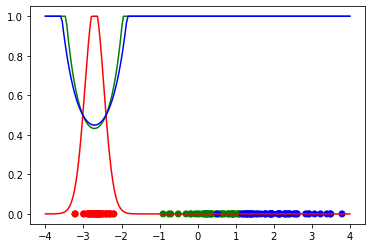

In [137]:
x = np.linspace(-4, 4, 200)
x = np.expand_dims(x, axis=1)

plt.plot(x, fi_setosa.predict(x), color='red')
plt.plot(x, fi_versicolor.predict(x), color='green')
plt.plot(x, fi_virginica.predict(x), color='blue')
plt.scatter(iris_X_1d, [0] * len(iris_X_1d), color=[col[c] for c in iris_y])
plt.show()